In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]



data = ames_housing.drop(columns=target_name)
data_numerical = data[numerical_features]
target = ames_housing[target_name]
ames_housing[numerical_features + [target_name]].corr()["SalePrice"]

LotFrontage      0.334901
LotArea          0.263843
MasVnrArea       0.475241
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
SalePrice        1.000000
Name: SalePrice, dtype: float64

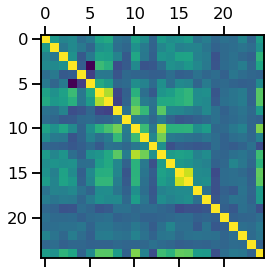

In [2]:
import matplotlib.pyplot as plt

plt.matshow(ames_housing[numerical_features + [target_name]].corr())
plt.show()

<AxesSubplot:>

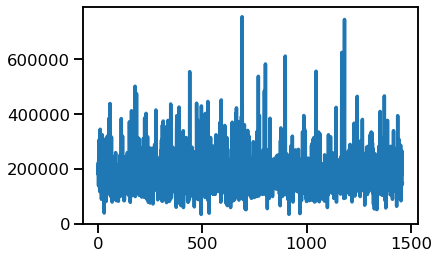

In [3]:
target.plot()

We will compare the generalization performance of a decision tree and a linear regression. For this purpose, we will create two separate predictive models and evaluate them by 10-fold cross-validation.

Thus, use sklearn.linear_model.LinearRegression and sklearn.tree.DecisionTreeRegressor to create the models. Use the default parameters for both models.

Be aware that a linear model requires to scale numerical features. Please use sklearn.preprocessing.StandardScaler so that your linear regression model behaves the same way as the quiz author intended ;)

## Question 1 (1 point possible)
By comparing the cross-validation test scores for both models fold-to-fold, count the number of times the linear model has a better test score than the decision tree model. Select the range which this number belongs to:

 a) [0, 3]: the linear model is substantially worse than the decision tree 
 
 b) [4, 6]: both models are almost equivalent 
 
 c) [7, 10]: the linear model is substantially better than the decision tree

In [12]:
df["reg"].shape, df["tree"].shape

((10,), (10,))

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

lr = LinearRegression()
cv_results_lr = cross_validate(lr, data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)
tree = DecisionTreeRegressor()

cv_results_tree = cross_validate(tree, data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)
df = pd.DataFrame({"reg": cv_results_lr["test_score"], "tree": cv_results_tree["test_score"]})
df["Tree_wins?"] = df["reg"] < df["tree"]
df

,reg,tree,Tree_wins?
0,-1.107287e+09,-1.995138e+09,False
1,-1.224279e+09,-1.764473e+09,False
2,-1.181252e+09,-1.842761e+09,False
3,-2.292363e+09,-3.520916e+09,False
4,-1.854372e+09,-2.411037e+09,False
5,-1.363485e+09,-2.034860e+09,False
6,-1.253093e+09,-2.734037e+09,False
7,-1.405640e+09,-1.979347e+09,False
8,-5.540283e+09,-3.010136e+09,True
9,-1.119210e+09,-1.539539e+09,False


## Question 2 (1 point possible)

Instead of using the default parameters for the decision tree regressor, we will optimize the max_depth of the tree. Vary the max_depth from 1 level up to 15 levels. Use nested cross-validation to evaluate a grid-search (sklearn.model_selection.GridSearchCV). Set cv=10 for both the inner and outer cross-validations, then answer the questions below

What is the optimal tree depth for the current problem?

 a) The optimal depth is ranging from 3 to 5 
 
 b) The optimal depth is ranging from 5 to 8
 
 c) The optimal depth is ranging from 8 to 11
 
 d) The optimal depth is ranging from 11 to 15

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [num for num in range(1, 16)]
}

tree = DecisionTreeRegressor()

model_grid_search = GridSearchCV(tree, param_grid=param_grid,
                                 n_jobs=2, cv=10)
model_grid_search.fit(data_numerical, target)

cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False)

cv_results.head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,0.009535,0.000208,0.001914,0.000085,6,{'max_depth': 6},0.699666,0.750558,0.693881,0.484811,0.762698,0.737579,0.689372,0.766617,0.644540,0.728665,0.695839,0.079068,1
6,0.010197,0.000444,0.001780,0.000090,7,{'max_depth': 7},0.616478,0.700528,0.731033,0.632124,0.778794,0.724092,0.684969,0.725991,0.531813,0.735989,0.686181,0.069216,2
4,0.008441,0.000312,0.001918,0.000109,5,{'max_depth': 5},0.590929,0.760759,0.670528,0.463232,0.738052,0.749435,0.669280,0.756933,0.679173,0.705370,0.678369,0.087394,3
7,0.010697,0.000939,0.001716,0.000152,8,{'max_depth': 8},0.597440,0.715640,0.788311,0.483245,0.766690,0.708327,0.559726,0.736313,0.568563,0.736865,0.666112,0.099100,4


In [30]:
cv_results["params"]

5      {'max_depth': 6}
6      {'max_depth': 7}
4      {'max_depth': 5}
7      {'max_depth': 8}
3      {'max_depth': 4}
13    {'max_depth': 14}
8      {'max_depth': 9}
9     {'max_depth': 10}
10    {'max_depth': 11}
11    {'max_depth': 12}
14    {'max_depth': 15}
12    {'max_depth': 13}
2      {'max_depth': 3}
1      {'max_depth': 2}
0      {'max_depth': 1}
Name: params, dtype: object

## Question 3 (1 point possible)

Now, we want to evaluate the generalization performance of the decision tree while taking into account the fact that we tune the depth for this specific dataset. Use the grid-search as an estimator inside a cross_validate to automatically tune the max_depth parameter on each cross-validation fold.

A tree with tuned depth

 a) is always worse than the linear models on all CV folds
 
 b) is often but not always worse than the linear model
 
 c) is often but not always better than the linear model
 
 d) is always better than the linear models on all CV folds

In [36]:
print("Tricky choice")

lr = LinearRegression()
cv_results_lr = cross_validate(lr, data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

tree = DecisionTreeRegressor(max_depth =6)

cv_results_tree = cross_validate(tree, data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)
df = pd.DataFrame({"reg": cv_results_lr["test_score"], "tree": cv_results_tree["test_score"]})
df["Tree_wins?"] = df["reg"] < df["tree"]
df

Tricky choice


,reg,tree,Tree_wins?
0,-1.107287e+09,-1.597233e+09,False
1,-1.224279e+09,-1.606587e+09,False
2,-1.181252e+09,-1.918521e+09,False
3,-2.292363e+09,-2.635342e+09,False
4,-1.854372e+09,-2.067645e+09,False
5,-1.363485e+09,-1.654392e+09,False
6,-1.253093e+09,-1.650458e+09,False
7,-1.405640e+09,-1.194556e+09,True
8,-5.540283e+09,-2.874092e+09,True
9,-1.119210e+09,-1.378985e+09,False


In [41]:
param_grid = {
    'max_depth': [num for num in range(1, 16)]
}

tree = DecisionTreeRegressor()

model_grid_search = GridSearchCV(tree, param_grid=param_grid,
                                 n_jobs=2, cv=10)

cv_results_tree = cross_validate(model_grid_search , data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                                 
                            return_estimator=True)
df = pd.DataFrame({"reg": cv_results_lr["test_score"], "tree": cv_results_tree["test_score"]})
df["Tree_wins?"] = df["reg"] < df["tree"]
df

,reg,tree,Tree_wins?
0,-1.107287e+09,-1.458303e+09,False
1,-1.224279e+09,-1.773044e+09,False
2,-1.181252e+09,-1.550345e+09,False
3,-2.292363e+09,-3.457671e+09,False
4,-1.854372e+09,-2.067645e+09,False
5,-1.363485e+09,-1.714905e+09,False
6,-1.253093e+09,-1.620213e+09,False
7,-1.405640e+09,-1.833650e+09,False
8,-5.540283e+09,-3.438270e+09,True
9,-1.119210e+09,-1.265031e+09,False


## Question 4 (1 point possible)

Instead of using only the numerical features you will now use the entire dataset available in the variable data.

Create a preprocessor by dealing separately with the numerical and categorical columns. For the sake of simplicity, we will assume the following:

categorical columns can be selected if they have an object data type;
use an OrdinalEncoder to encode the categorical columns;
numerical columns can be selected if they do not have an object data type. It will be the complement of the numerical columns.
In addition, set the max_depth of the decision tree to 7 (fixed, no need to tune it with a grid-search).

Evaluate this model using cross_validate as in the previous questions.

A tree model trained with both numerical and categorical features

a) is most often worse than the tree model using only the numerical features
    
b) is most often better than the tree model using only the numerical features

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

preprocessor_cat = ColumnTransformer([('cat_preprocessor', categorical_preprocessor, categorical_columns),],
                                 remainder='passthrough', parse_threshold=0)

In [62]:
print([col for col in data.columns if col not in categorical_columns], sep = ",")

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [66]:
print(numerical_features, sep = ",")

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [63]:
print(categorical_columns, sep = ",")

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [51]:
model = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", KNeighborsClassifier(n_neighbors=5)),
])

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']